In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
dt=pd.read_csv("D:/Ad_py_lib.csv/ml_csv/Kmeanssalry.csv")
# dt['Age'].describe()

In [4]:
dt

,Age,Income
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000
5,39,150000
6,41,160000
7,38,162000
8,36,156000
9,35,130000


In [39]:
# MinMaxScaler(Normalization)0-1
# StandardScaler(Standardlization)mean=0 and standard deviation=1,formula x-mean/sd 
scaler=MinMaxScaler()#x-x(min)/x(max)-x(min):(Normalization)(It is sensitive to outlier)
dt['Age']=scaler.fit_transform(dt[['Age']])
scaler.fit(dt[['Income']])
dt['Income']=scaler.transform(dt[['Income']])

In [40]:
km=KMeans(n_clusters=3)
# km = KMeans(n_clusters=3, n_init = 10, random_state = 42)

In [41]:
km

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [42]:
ypred=km.fit_predict(dt[['Age','Income']])
dt['Cluster']=ypred

In [43]:
dt

,Age,Income,Cluster
0,0.058824,0.213675,1
1,0.176471,0.384615,1
2,0.176471,0.136752,1
3,0.117647,0.128205,1
4,0.941176,0.897436,0
5,0.764706,0.897436,0
6,0.882353,0.982906,0
7,0.705882,1.000000,0
8,0.588235,0.948718,0
9,0.529412,0.726496,0


#### Instead of scaling you could use simple transformation such as division of income by 1000

In [26]:
ndt=dt['Income']/1000
ndt

0      70.0
1      90.0
2      61.0
3      60.0
4     150.0
5     150.0
6     160.0
7     162.0
8     156.0
9     130.0
10    137.0
11     45.0
12     48.0
13     51.0
14     49.5
15     53.0
16     65.0
17     63.0
18     64.0
19     80.0
20     82.0
21     58.0
Name: Income, dtype: float64

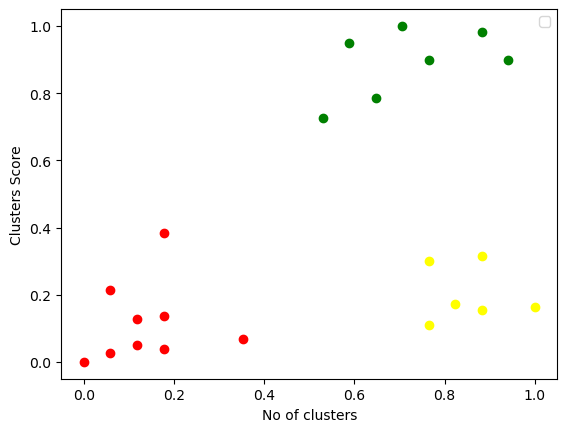

In [45]:
dt1=dt[dt.Cluster==0]
dt2=dt[dt.Cluster==1]
dt3=dt[dt.Cluster==2]
plt.scatter(dt1['Age'],dt1['Income'],color='green')
plt.scatter(dt2['Age'],dt2['Income'],color='red')
plt.scatter(dt3['Age'],dt3['Income'],color='yellow')
plt.xlabel('No of clusters')
plt.ylabel('Clusters Score')
plt.legend()

In [46]:
km.cluster_centers_

array([[0.72268908, 0.89133089],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

In [31]:
# labels = km.labels_
# centroids = km.cluster_centers_


In [32]:
# plt.figure(figsize=(5, 5))
# plt.scatter(centroids[:,0], centroids[:,1], marker="s", s = 100, c="red" ,cmap="Viridis")
# plt.scatter(dt["Age"], dt["Income"], c=labels)
# plt.legend()
# plt.xlabel("Age")
# plt.ylabel("Income (in thousands)")

# -----------------------------------------------------

In [10]:
wcss=[] 
for i in range(1,15): 
    km1=KMeans(n_clusters=i)
    km1.fit_predict(dt)
    wcss.append(km1.inertia_)

In [11]:
wcss

[39126330276.72727,
 3289662512.5904756,
 2591933926.5333333,
 1030229004.1523808,
 332500418.0952381,
 227967079.12857142,
 170800332.36666664,
 116800251.7,
 100133576.86666667,
 68021099.25,
 48354283.83333333,
 24354270.333333336,
 13791766.333333332,
 13166756.333333332]

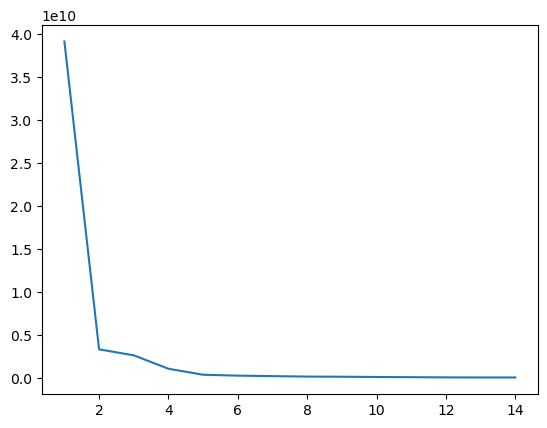

In [12]:
plt.plot(range(1,15),wcss)

In [13]:
x=dt.iloc[:].values
km2=KMeans(n_clusters=4)
y_means=km2.fit_predict(x)

In [14]:
y_means

array([0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [22]:
x[y_means==1]
# x[y_means==1,0]

array([[    42, 150000],
       [    39, 150000],
       [    41, 160000],
       [    38, 162000],
       [    36, 156000],
       [    35, 130000],
       [    37, 137000]])

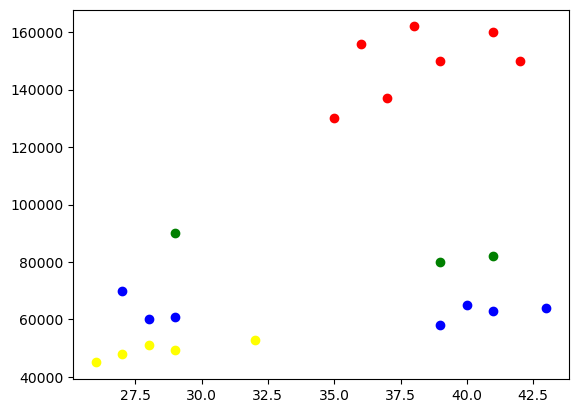

In [25]:
plt.scatter(x[y_means==0,0],x[y_means==0,1],color='blue')
plt.scatter(x[y_means==1,0],x[y_means==1,1],color='red') 
plt.scatter(x[y_means==2,0],x[y_means==2,1],color='green') 
plt.scatter(x[y_means==3,0],x[y_means==3,1],color='yellow')